### Import

In [ ]:
from QuantLib import *

In [3]:
today = Date(7, March, 2014)
Settings.instance().evaluationDate = today

### Option

In [4]:
option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0),
                       EuropeanExercise(Date(7, June, 2014)))

### Black-Scholes formula

In [5]:
u = SimpleQuote(100.0)
r = SimpleQuote(0.01)
sigma = SimpleQuote(0.20)

In [7]:
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [9]:
process = BlackScholesProcess(QuoteHandle(u),
                             YieldTermStructureHandle(riskFreeCurve),
                             BlackVolTermStructureHandle(volatility))

In [10]:
engine = AnalyticEuropeanEngine(process)

In [11]:
option.setPricingEngine(engine)

In [13]:
option.NPV()

4.155543462156206

In [16]:
option.delta()
option.gamma()
option.vega()

20.109632428723106

### Market Changes

In [17]:
option.NPV()

4.155543462156206

In [18]:
u.setValue(105.0)
option.NPV()

7.27556357927846

In [29]:
%%capture
%pylab inline --no-import-all
import matplotlib.pyplot as plot
import numpy as np
from IPython.display import display

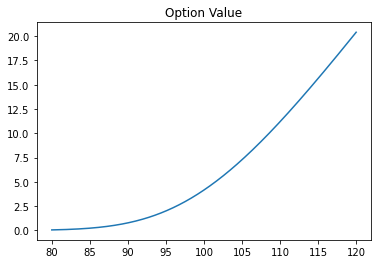

In [30]:
f, ax = plot.subplots()
xs = np.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title('Option Value')
_ = ax.plot(xs, ys)

### Date Changes

In [31]:
u.setValue(105.0)
option.NPV()

7.27556357927846

In [32]:
Settings.instance().evaluationDate = Date(7, April, 2014)

In [33]:
option.NPV()

6.560073820974377

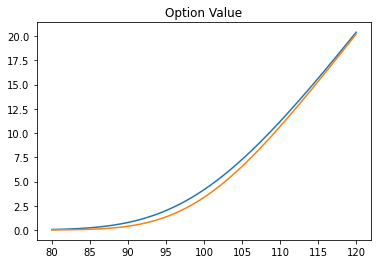

In [34]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys)
display(f)

In [35]:
Settings.instance().evaluationDate = Date(7, May, 2014)

In [36]:
Settings.instance().evaluationDate = Date(17, May, 2014)

In [37]:
Settings.instance().evaluationDate = Date(27, May, 2014)

In [38]:
Settings.instance().evaluationDate = Date(6, June, 2014)

In [39]:
Settings.instance().evaluationDate = Date(7, June, 2014)

In [40]:
option.NPV()

0.0

### Heston Model

In [41]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [42]:
option.NPV()

7.27556357927846

In [43]:
r.setValue(0.03)

In [44]:
option.NPV()

7.624029148527754

In [45]:
sigma.setValue(0.25)

In [46]:
option.NPV()

8.531296969971573

### Other Pricing Methods

In [47]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [48]:
option.NPV()

7.27556357927846

In [49]:
model = HestonModel(
    HestonProcess(YieldTermStructureHandle(riskFreeCurve),
                  YieldTermStructureHandle(FlatForward(0, TARGET(), 0.0, Actual360())),
                  QuoteHandle(u),
                  0.04, 0.1, 0.01, 0.05, -0.75))

In [50]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [51]:
option.NPV()

7.295356086978629

### Lazy Recalculation

In [53]:
engine = MCEuropeanEngine(process, "PseudoRandom",
                          timeSteps=20,
                          requiredSamples=250000)
option.setPricingEngine(engine)

In [54]:
option.NPV()

7.273913002697302

In [56]:
u.setValue(104.0)

In [57]:
option.NPV()

6.582501116966657